# Deep Learning Project

## MNIST Hand-Written Digit Recognition using KERAS

Here, we shall use a Deep-Learning framework i.e. CNN (Convlution Neural Network) on MNIST dataset. 

MNIST dataset holds images with pixel size of 784 [28x28] of Hand-Written Digits from 0 to 9 (10 in numbers).

We will be building a model using KERAS which is layered on Tensorflow framework at the backend.

### Approach:
1. Import Relevant Modules
2. Data Collection & Understanding Data by plotting images for Train and Test
3. Importing KERAS Models and Layers
4. Building Model with 3 Convolutional Layers and 1 Fully-Connected Layer with Softmax to classify
4. Compiling with Adam Optimizer
5. Fitting this model to know Accuracy/Loss on Tain and Test Data

### Step 1: Import Relevant Modules

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

C:\Users\Nivedit\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# To avoid using PRINT multiple times in single execution
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
# Setting the seed
np.random.seed(42)

### Step 2: Data Collection & Understanding Data by plotting images for Train and Test

#### 2.1
Just to understand this Data, we have used "one_hot=False". Using this, we will get Labels as single number or array. This number is actually the label of image.

In [4]:
mnist = input_data.read_data_sets("MNIST_data", one_hot = False)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
# Fetching as TRAIN and TEST objects
trainX = mnist.train.images
trainY = mnist.train.labels
testX = mnist.test.images
testY = mnist.test.labels

In [6]:
# Cheking Shape of Train and Test
for i in [trainX, trainY, testX, testY]:
    i.shape

(55000, 784)

(55000,)

(10000, 784)

(10000,)

In [7]:
# Reshaping trainX and testX from 2 Dimensional data into 3 Dimensional i.e. 784 features into [28x28]
trainX = trainX.reshape([55000,28,28])
testX = testX.reshape([10000,28,28])

#### 2.1.1 : Checking few of these images in Train and Test by plotting

In [8]:
# Function to plot Image at position on Train or Test data
def fun_plot_image(data,i):
    plt.figure()
    plt.imshow(data[i], cmap='gray')
    plt.show()

At 13 position :->
Label for image in Train is : 2
Label for image in Test is : 0


This Image for Train is :


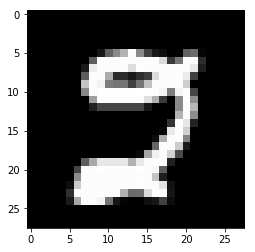

This Image for Test is :


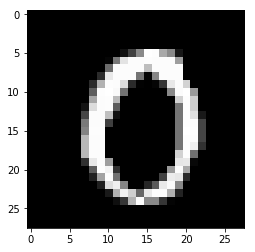



At 14 position :->
Label for image in Train is : 7
Label for image in Test is : 1


This Image for Train is :


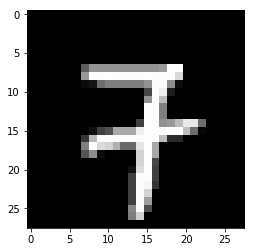

This Image for Test is :


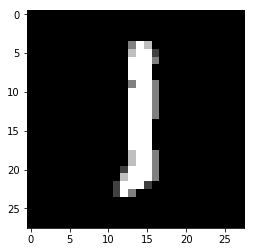

In [9]:
# Let's see Labels for some random samples in trainY and testY for images by plotting these
for i in range(13,15):
    print("At", i, "position :->")
    print("Label for image in Train is : {}".format(trainY[i]))
    print("Label for image in Test is : {}".format(testY[i]))
    print("\n")
    print("This Image for Train is :")
    fun_plot_image(trainX,i)
    print("This Image for Test is :")
    fun_plot_image(testX,i)
    print("\n")

#### 2.2 : Re-reading MNIST, but, now with "one_hot=True"

Passing "one_hot = True" will ensure to get labels in an array of shape [1x10]. Exactly the position with value as "1" means that particular number while all other position to be 0.

For example: if the label is '5', it will be fetched in an array as [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]

This is same as what we do in <i>Pandas get_dummies()</i> function

In [10]:
mnist = input_data.read_data_sets("MNIST_Data", one_hot=True)

Extracting MNIST_Data\train-images-idx3-ubyte.gz
Extracting MNIST_Data\train-labels-idx1-ubyte.gz
Extracting MNIST_Data\t10k-images-idx3-ubyte.gz
Extracting MNIST_Data\t10k-labels-idx1-ubyte.gz


In [11]:
# Fetching as TRAIN and TEST objects
trainX = mnist.train.images
trainY = mnist.train.labels
testX = mnist.test.images
testY = mnist.test.labels

In [12]:
# Cheking Shape and Sample details of Train and Test
for i in [trainX, trainY, testX, testY]:
    i.shape
    i[:2]

(55000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

(55000, 10)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

(10000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

(10000, 10)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

#### 2.2.1: Can figure out that:

TRAIN data holds:
- trainX:
    - 55K Hand-Written Images of Digits as Number of Rows
    - 784 Features as Pixel Size of dimension 28x28 as Number of Columns


- trainY:
    - 55K Hand-Written Images of Digits as Number of Rows
    - 10 as Number of Columns resulting from "one_hot = True" signifying Labels for each image in trainX (as Classification)

TEST data holds:
- testX:
    - 10K Hand-Written Images of Digits as Number of Rows
    - 784 Features as Pixel Size of dimension 28x28 as Number of Columns


- testY:
    - 10K Hand-Written Images of Digits as Number of Rows
    - 10 as Number of Columns resulting from "one_hot = True" signifying Labels for each image in testX (as Classification)

### Step 3: Importing KERAS Models and Layers

In [13]:
# Sequential Model
from tensorflow.python.keras.models import Sequential

# Different Layers
from tensorflow.python.keras.layers import Reshape, Conv2D, Dropout, Flatten, Dense

### Step 4: Building Model with 3 Convolutional Layers and 1 Fully-Connected Layer with Softmax to classify

#### 4.1: Sequential Model

In [14]:
model = Sequential()

#### 4.2: RESHAPE MNIST data from 2 Dimension to 3 Dimension so that same can be modelled into CNN Layers

In [15]:
# Reshape MNIST from 784 into 28*28*1 -> into 3D to be pushed into CONVOLUTION
model.add(Reshape((28,28,1), input_shape=(784,)))

#### 4.3: First CNN Layer with:
- 6 Filters
- Size of Each Filter as 6x6
- Strides of 1x1

In [16]:
model.add(Conv2D(6, kernel_size=(6,6), activation='relu', strides=(1,1)))

#### 4.4: Second CNN Layer with:
- 12 Filters
- Size of Each Filter as 5x5
- Strides of 2x2

In [17]:
model.add(Conv2D(12, kernel_size=(5,5), activation='relu', strides=(2,2)))

#### 4.3: Third CNN Layer with:
- 24 Filters
- Size of Each Filter as 4x4
- Strides of 2x2

In [18]:
model.add(Conv2D(24, kernel_size=(4,4), activation='relu', strides=(2,2)))

#### 4.4: Fourth and final CNN Layer to reduce number of parameters (Weights and Bias) to learn:
- 6 Filters
- Size of Each Filter as 1x1
- Strides of 1x1

In [19]:
model.add(Conv2D(6, kernel_size=(1,1), activation='relu', strides=(1,1)))

#### 4.5: Re-convert this output into 2 Dimensinal from 3 Dimensional by FALTTENing

In [20]:
model.add(Flatten())

#### 4.6: Adding Fully-Connected Dense Layer with Softmax to classify digits basis probability

In [21]:
model.add(Dense(10, activation='softmax'))

#### 4.7: Compile using ADAM optimizer

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### 4.8: FIT this model on train and test

In [23]:
model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=2, epochs=2)

Train on 55000 samples, validate on 10000 samples
Epoch 1/2
55000/55000 [==============================] - 278s - loss: 0.1763 - acc: 0.9463 - val_loss: 0.0732 - val_acc: 0.9750
Epoch 2/2
55000/55000 [==============================] - 272s - loss: 0.0803 - acc: 0.9752 - val_loss: 0.0567 - val_acc: 0.9812


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 6)         222       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 12)        1812      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 24)          4632      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 6)           150       
_________________________________________________________________
flatten_1 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                970       
Total para